## Gender Identification Model

### Problem Statement
#### Given the name, can we identify the gender of the person?

In [1]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import re
import pickle

In [2]:
## load the initial Train dataset
# dt = pd.read_csv("../../../Njambanene/Njambanene/Tasks/Name_Identification/Indian-Name.csv",encoding='cp1252')
dt = pd.read_csv("../../Njambanene/Tasks/Name_Identification/Feb  Members Spend Analysis  - Active 1 Members.csv")

In [3]:
#### Sample the dataset
dt.head()

,Member Name,Gender
0,MUOKI,Male
1,PEACE,Female
2,MWIYERIA KANANA,Female
3,JACKLINE,Female
4,JANE MUTHONI,Female


In [4]:
## rename column
dt = dt.rename(columns={'Member Name': 'Name'})

In [5]:
## Check data types and attributes
print(dt.columns)

print(dt.dtypes)

Index(['Name', 'Gender'], dtype='object')
Name      object
Gender    object
dtype: object


In [6]:
def count_one_word_names(name):
  """Counts the number of names with one word in a list of names.

  Args:
    names: A list of names.

  Returns:
    The number of names with one word.
  """

  count = 0
  for name in name:
    if len(name.split()) == 1:
      count += 1
  return count


In [7]:
## proportion of one-word names
one_word_names = round(count_one_word_names(dt['Name'])/len(dt)*100,2)

print(f"The proportion of one-word names is: {one_word_names}%")

The proportion of one-word names is: 48.07%


In [8]:
# names = dt['Name'].apply(lambda x: x.lower())

In [9]:
## replace col values
# dt['Gender'] = dt['Gender'].replace({0:"M",1:"F"})

In [10]:
## shape of data
print(dt.shape)

(12874, 2)


In [11]:
## Function for Cleaning Names
def clean_name(value):
    # Convert float values to string
    if isinstance(value, float):
        value = str(value)

    # Truncate the name to the first three words
    words = value.split()
    truncated_words = words[:3]
    truncated_name = ' '.join(truncated_words)

    # Remove extraneous white spaces using regular expression substitution
    dropped_whitespaces = re.sub(r'\s+', ' ', truncated_name)

    # Drop non-name words and remove characters after hyphen, underscore, or brackets
    pattern = r"\b(?:[^A-Za-z\s]|(?!^)\d)\b|[-_()\[\]]"
    names_only = re.sub(pattern, '', dropped_whitespaces)

    # Remove the pattern and everything after it
    pattern = r"\b(?:DO NOT|DONT|SAYS|REQUEST|CUSTOMER|LOCK|NOT|REQUESTED|ACCOUNT|TRANSFER|CUSTOMERS|DONOT|REPORTED|LOST|STOLEN|COOKER|CANISTER|KINDLY|GIVE)\b.*"
    drop_nonnames = re.sub(pattern, '', names_only)

    # Remove special characters (excluding spaces) from the name
    pattern = r'[^A-Za-z\s]'
    cleaned_name = re.sub(pattern, '', drop_nonnames)

    return cleaned_name.strip()


In [12]:
# Apply the clean function to the 'Name' column
dt['Cleaned Name'] = dt['Name'].apply(clean_name)#apply(convert_float_and_remove_numbers).apply(truncate_drop_and_clean)
dt.head()

,Name,Gender,Cleaned Name
0,MUOKI,Male,MUOKI
1,PEACE,Female,PEACE
2,MWIYERIA KANANA,Female,MWIYERIA KANANA
3,JACKLINE,Female,JACKLINE
4,JANE MUTHONI,Female,JANE MUTHONI


In [13]:
## unique names 
print(len(dt['Cleaned Name'].unique()))

7807


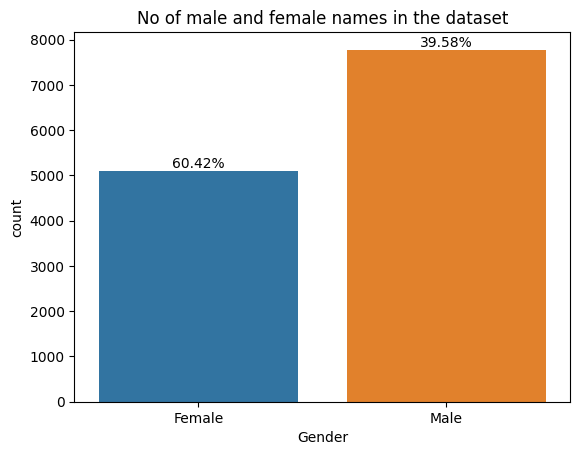

In [121]:
## plot for male and female names in the data
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x='Gender', data=dt)

# Calculate the proportions for each category
total = len(dt)
counts = dt['Gender'].value_counts()
proportions = counts / total

# Sort the counts and proportions in descending order
sorted_counts = counts.sort_values(ascending=False)
sorted_proportions = proportions.loc[sorted_counts.index]


# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

sns.countplot(x='Gender', data=dt)
plt.title('No of male and female names in the dataset')
plt.xticks([0,1],('Female','Male'))
plt.show()

In [15]:
## analyze starting letters of names
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(dt[dt['Name'].str.startswith(i)])

print(startletter_count)

{'A': 796, 'B': 464, 'C': 726, 'D': 603, 'E': 982, 'F': 434, 'G': 431, 'H': 249, 'I': 178, 'J': 1677, 'K': 325, 'L': 579, 'M': 1641, 'N': 463, 'O': 62, 'P': 753, 'Q': 8, 'R': 577, 'S': 987, 'T': 276, 'U': 4, 'V': 266, 'W': 334, 'X': 0, 'Y': 21, 'Z': 37}


Text(0.5, 1.0, 'Number of names starting with each letter')

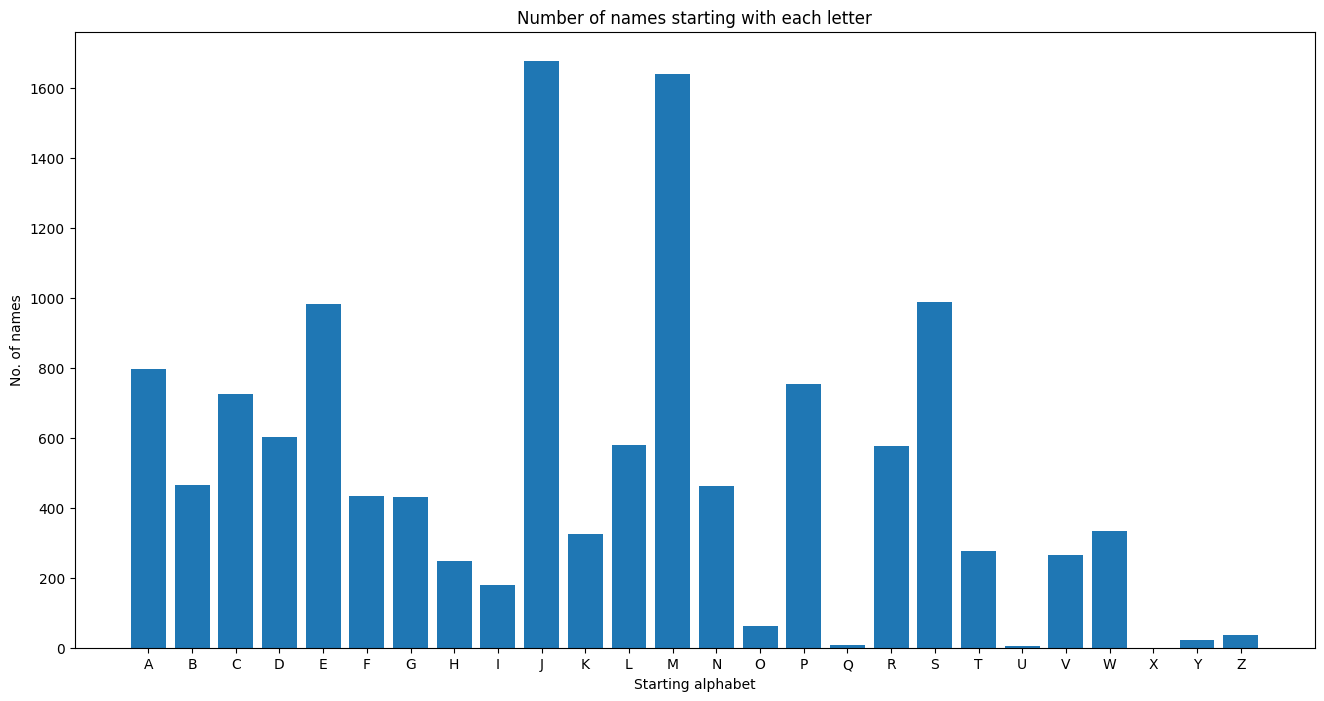

In [16]:
## visualize starting letters
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [17]:
## check most common starting alphabets
print('The 5 most common starting letters are : ', *sorted (startletter_count.items(),key=lambda item: item[1])[-5:][::-1])

The 5 most common starting letters are :  ('J', 1677) ('M', 1641) ('S', 987) ('E', 982) ('A', 796)


In [18]:
## analyze ending letters of names
small_alphabets = ['a','b','c','d','e','f','g','h',

                   'i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']

endletter_count ={}

for i in small_alphabets:
    endletter_count[i] = len(dt[dt['Name'].str.endswith(i)])

print(endletter_count)

{'a': 2, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 2, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 2, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 5, 'v': 0, 'x': 0, 'y': 0, 'z': 0}


Text(0.5, 1.0, 'Number of names ending with each letter')

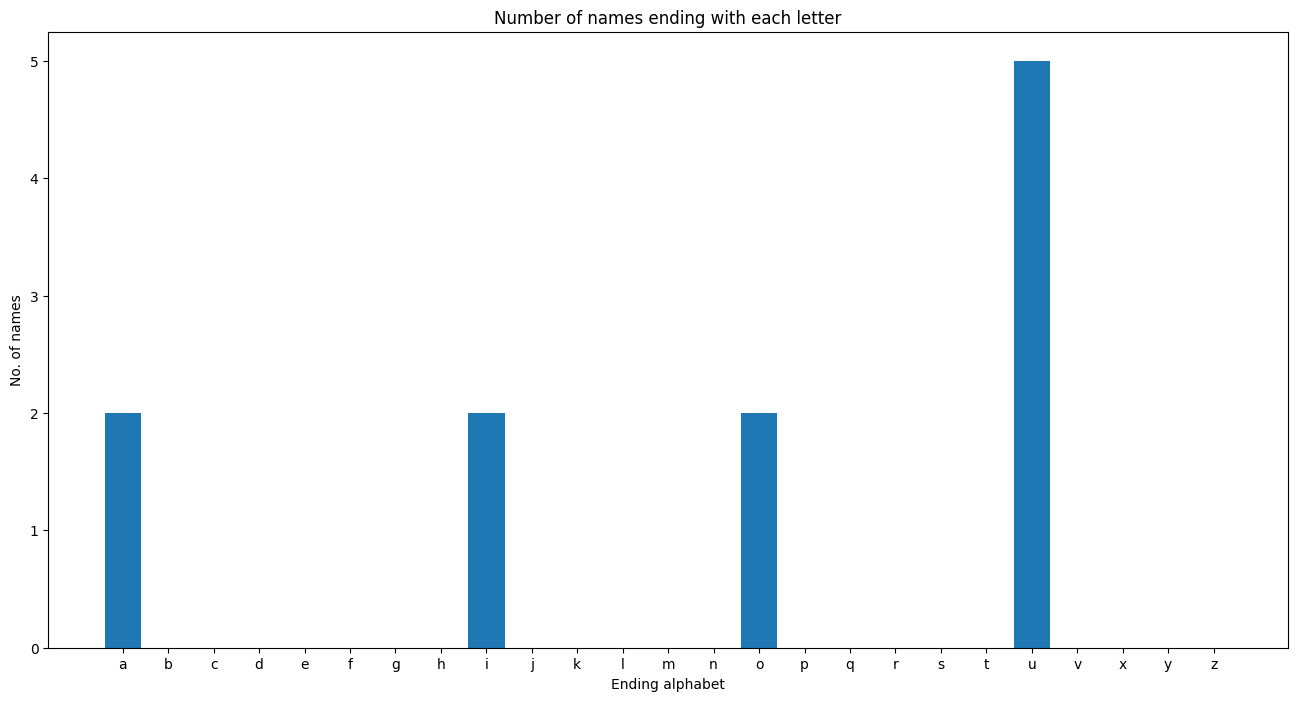

In [19]:
plt.figure(figsize = (16,8))

plt.bar(endletter_count.keys(),endletter_count.values())

plt.xlabel('Ending alphabet')

plt.ylabel('No. of names')

plt.title('Number of names ending with each letter')

In [20]:
## most common name ending letters
print("The 5 most name ending letters are : ",*sorted(endletter_count.items(),
                                                      key=lambda item: item[1])[-5:][::-1])

The 5 most name ending letters are :  ('u', 5) ('o', 2) ('i', 2) ('a', 2) ('z', 0)


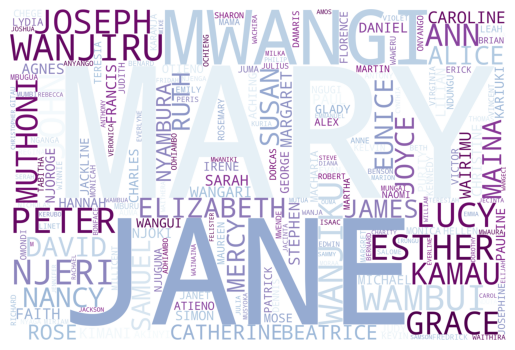

In [21]:
# building a word cloud

text =  " ".join(i for i in dt.Name)

word_cloud = WordCloud(

        width=3000,

        height=2000,

        random_state=1,

        background_color="white",

        colormap="BuPu",

        collocations=False,
        stopwords= STOPWORDS,

        ).generate(text)

plt.imshow(word_cloud)

plt.axis("off")    

plt.show()

In [22]:
## build model
X = list(dt['Cleaned Name'])
Y = list(dt['Gender'])

In [23]:
## encode the labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [24]:
## count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'char')
X = cv.fit_transform(X).toarray()



In [25]:
## split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state= 42)

In [26]:
## logistic regression
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
LR_y_pred = LR_model.predict(x_test)

In [27]:
## Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)
NB_y_pred = NB_model.predict(x_test)

In [28]:
## K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create an instance of the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)


In [29]:
## preview prediction output
df_predictions2 = pd.DataFrame({'Name': dt.loc[range(len(x_test)),'Name'], 'Predicted_Gender': encoder.inverse_transform(knn_y_pred)})
df_predictions2.head()

,Name,Predicted_Gender
0,MUOKI,Female
1,PEACE,Male
2,MWIYERIA KANANA,Male
3,JACKLINE,Female
4,JANE MUTHONI,Female


In [30]:
## XGBoost
from xgboost import XGBClassifier


# Define the seed
seed = 42

XGB_model = XGBClassifier(random_state= seed) #use_label_encoder = False
XGB_model.fit(x_train,y_train)
XGB_y_pred = XGB_model.predict(x_test)


In [31]:
## preview prediction output

XGB_y_pred = XGB_y_pred.tolist()
df_predictions = pd.DataFrame({'Cleaned Name': dt.loc[range(len(x_test)), 'Cleaned Name'], 'Predicted_Gender': encoder.inverse_transform(XGB_y_pred)})
df_predictions.head()

,Cleaned Name,Predicted_Gender
0,MUOKI,Male
1,PEACE,Female
2,MWIYERIA KANANA,Male
3,JACKLINE,Female
4,JANE MUTHONI,Female


In [32]:
## Comparison of performance
### function for confusion matrix
from sklearn.metrics import confusion_matrix
def cmatrix(model):
    y_pred = model.predict(x_test)
    cmatrix = confusion_matrix(y_test,y_pred)
    print(cmatrix)
    sns.heatmap(cmatrix,fmt = 'd',cmap='BuPu', annot=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')

Accuracy: 71.52%
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      2563
           1       0.68      0.53      0.60      1686

    accuracy                           0.72      4249
   macro avg       0.71      0.68      0.69      4249
weighted avg       0.71      0.72      0.71      4249

[[2137  426]
 [ 784  902]]
None


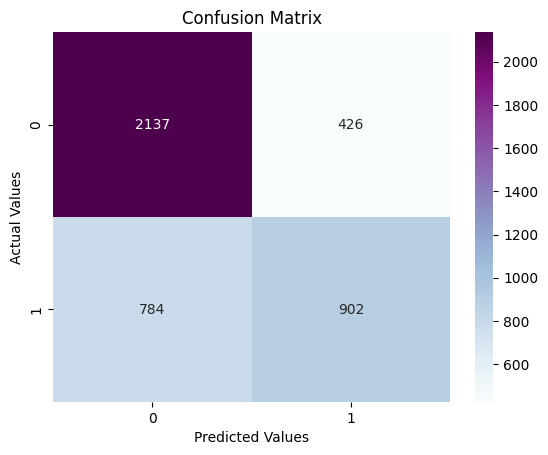

In [33]:
## output
import sklearn.metrics as metrics

# for logistic regression
accuracy = metrics.accuracy_score(LR_y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test,LR_y_pred))
print(cmatrix(LR_model))

Accuracy: 67.64%
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      2563
           1       0.64      0.43      0.51      1686

    accuracy                           0.68      4249
   macro avg       0.66      0.63      0.64      4249
weighted avg       0.67      0.68      0.66      4249

[[2152  411]
 [ 964  722]]
None


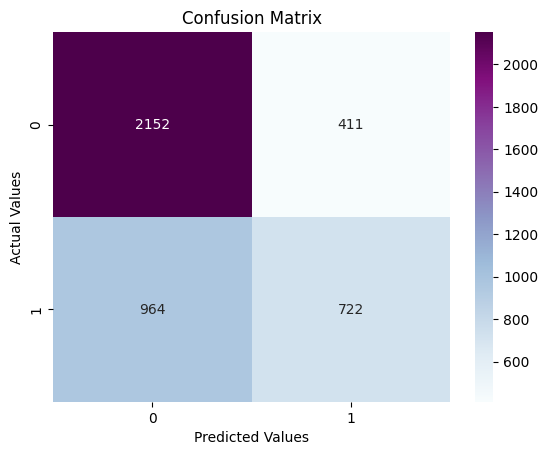

In [34]:
# for naive bayes

accuracy = metrics.accuracy_score(NB_y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

Accuracy: 83.95%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2563
           1       0.83      0.75      0.79      1686

    accuracy                           0.84      4249
   macro avg       0.84      0.82      0.83      4249
weighted avg       0.84      0.84      0.84      4249

[[2300  263]
 [ 419 1267]]
None


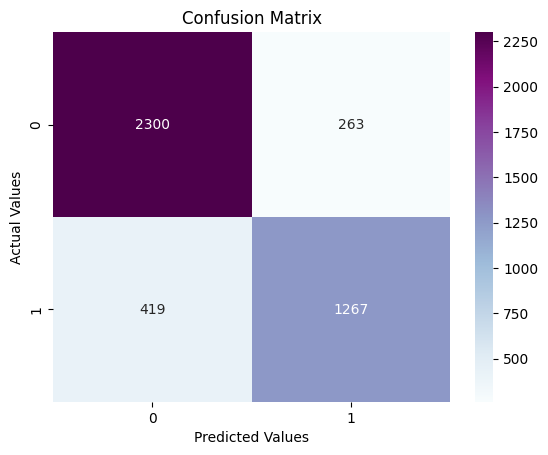

In [35]:
# for knn
accuracy = metrics.accuracy_score(knn_y_pred,y_test)

print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test,knn_y_pred))

print(cmatrix(knn_model))

0.8672628853847965
Accuracy: 86.73%
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2563
           1       0.85      0.80      0.83      1686

    accuracy                           0.87      4249
   macro avg       0.86      0.86      0.86      4249
weighted avg       0.87      0.87      0.87      4249

[[2333  230]
 [ 334 1352]]
None


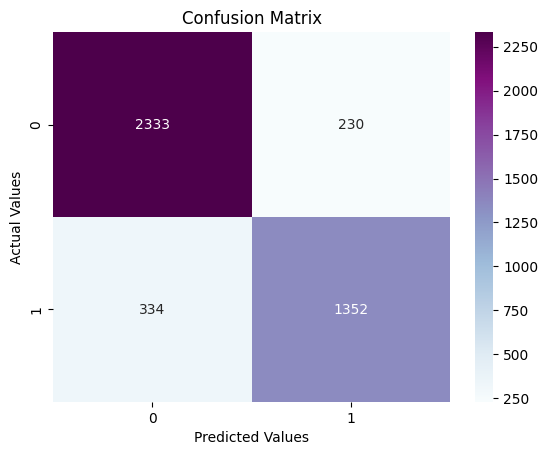

In [36]:
# for XGBoost
print(metrics.accuracy_score(XGB_y_pred,y_test))

accuracy = metrics.accuracy_score(XGB_y_pred,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, XGB_y_pred))

print(cmatrix(XGB_model))

### Choosen Model

In [37]:
## XGBoost
from xgboost import XGBClassifier


# Define the seed
seed = 42

XGB_model = XGBClassifier(random_state = seed) #use_label_encoder = False
XGB_model.fit(x_train,y_train)

# Save the model and the seed
model_filename = "name_classification_xgb.pkl"
model_data = {
    "model": XGB_model,
    "seed": seed
}

with open(model_filename, "wb") as file:
    pickle.dump(model_data, file)


XGB_y_pred = XGB_model.predict(x_test)

In [38]:
## preview prediction output

XGB_y_pred = XGB_y_pred.tolist()
dt_predictions = pd.DataFrame({'Cleaned Name': dt.loc[range(len(x_test)), 'Name'], 'Predicted_Gender': encoder.inverse_transform(XGB_y_pred)})
dt_predictions.head()

,Cleaned Name,Predicted_Gender
0,MUOKI,Male
1,PEACE,Female
2,MWIYERIA KANANA,Male
3,JACKLINE,Female
4,JANE MUTHONI,Female


In [39]:
dt_predictions.shape

(4249, 2)

### Run predictions on cust_prof_gend data --validation of data w Gender

In [40]:
# import os

# pydomo_client_id = os.getenv('PYDOMO_CLIENTID')
# pydomo_secret = os.getenv('PYDOMO_SECRET')



In [41]:
## create domo python connection
from pydomo import Domo
from dotenv import dotenv_values


env_values = dotenv_values('.env')

domo = Domo(env_values['PYDOMO_CLIENTID'], env_values['PYDOMO_SECRET'])

In [42]:
# Download a data set from Domo
cust_prof_gender = domo.ds_get('9e6aecb0-9669-4787-894d-43c496b4c928')
cust_prof_gender.head()

,customer_id,num_canisters,name,gender,is_club_customer
0,1111966,1,MARY NGLN,1,0
1,1249576,1,AMIR,2,0
2,841007,1,LEAH,1,0
3,1434685,1,JOSEPH,2,0
4,2411225,1,NYAMWEYA,2,0


In [43]:
## drop unnecessary columns
cust_prof_gender = cust_prof_gender.drop(['num_canisters','is_club_customer'],axis=1)

In [44]:
# Map values from 1 to "female" and 2 to "male" in the 'Gender' column
cust_prof_gender['gender'] = cust_prof_gender['gender'].map({1: 'Female', 2: 'Male'})
cust_prof_gender['gender'].value_counts(normalize=True)

Female    0.56452
Male      0.43548
Name: gender, dtype: float64

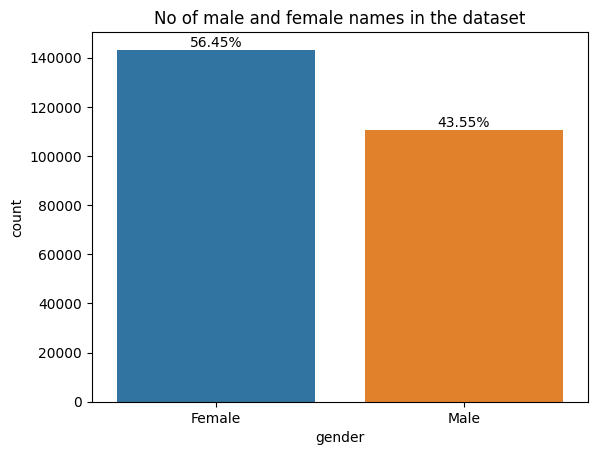

In [117]:
## plot for male and female names in the loaded data

# Create the countplot
ax = sns.countplot(x='gender', data=cust_prof_gender)

# Calculate the proportions for each category
total = len(cust_prof_gender)
counts = cust_prof_gender['gender'].value_counts()
proportions = counts / total

# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# Set the title and x-axis tick labels
plt.title('No of male and female names in the dataset')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()

In [45]:
  ## proportion of one-word names
one_word_names2 = round(count_one_word_names(cust_prof_gender['name'])/len(cust_prof_gender)*100,2)

print(f"The proportion of one-word-names is: {one_word_names2}%")

The proportion of one-word-names is: 61.67%


In [46]:
## update dataset to predict
# df = pd.read_csv("../../Njambanene/Tasks/Name_Identification/Fuel Customers_test.csv")
df = cust_prof_gender
## rename col
df = df.rename(columns= {'name': 'Name','gender':'Gender'})
df.head()

,customer_id,Name,Gender
0,1111966,MARY NGLN,Female
1,1249576,AMIR,Male
2,841007,LEAH,Female
3,1434685,JOSEPH,Male
4,2411225,NYAMWEYA,Male


In [47]:
## check shape
df.shape


(253736, 3)

In [48]:
# Apply the clean function to the 'Name' column
df['Cleaned Name'] = df['Name'].apply(clean_name)#apply(convert_float_and_remove_numbers).apply(truncate_drop_and_clean)
df.head()

,customer_id,Name,Gender,Cleaned Name
0,1111966,MARY NGLN,Female,MARY NGLN
1,1249576,AMIR,Male,AMIR
2,841007,LEAH,Female,LEAH
3,1434685,JOSEPH,Male,JOSEPH
4,2411225,NYAMWEYA,Male,NYAMWEYA


In [49]:
# df = add_name_length_column(df['Cleaned Name']).sort_values(by ='Name Length' ,ascending=False)
# df.head(30)

In [50]:
## preprocessing transforms
df_test = list(df['Cleaned Name'])

In [51]:
## vectorization
df_test = cv.fit_transform(df_test).toarray()

In [52]:
## truncate to train data's number of attributes
# num_attributes = X.shape[1]

# truncated_array = cv.fit_transform(df_test).toarray()[:, :num_attributes]


In [53]:
## check shape of training vs test data
# df_test = truncated_array
print("Shape of df_test:", df_test.shape)
# print("Shape of truncated_array:", truncated_array.shape)

print("Shape of df_train:", X.shape)

Shape of df_test: (253736, 27)
Shape of df_train: (12874, 27)


In [54]:
## load and run saved model
### Run the model on new data
import xgboost as xgb

# Load the saved model and seed
model_filename = "name_classification_xgb.pkl"

with open(model_filename, "rb") as file:
    model_data = pickle.load(file)

XGB_model = model_data["model"]
seed = model_data["seed"]


predictions = XGB_model.predict(df_test)


In [55]:
## preview prediction output

predictions = predictions.tolist()
cust_prof_gender_predictions = pd.DataFrame({'customer_id': df['customer_id'],'Cleaned Name': df.loc[range(len(df_test)), 'Cleaned Name'], 'Predicted_Gender': encoder.inverse_transform(predictions)})
cust_prof_gender_predictions.head()

,customer_id,Cleaned Name,Predicted_Gender
0,1111966,MARY NGLN,Female
1,1249576,AMIR,Female
2,841007,LEAH,Female
3,1434685,JOSEPH,Male
4,2411225,NYAMWEYA,Male


In [56]:
cust_prof_gender_predictions.shape


(253736, 3)

In [57]:
## join prediction with original dataset for validations
df2 = df.merge(cust_prof_gender_predictions,left_index=True,right_index=True)
df2.head()

,customer_id_x,Name,Gender,Cleaned Name_x,customer_id_y,Cleaned Name_y,Predicted_Gender
0,1111966,MARY NGLN,Female,MARY NGLN,1111966,MARY NGLN,Female
1,1249576,AMIR,Male,AMIR,1249576,AMIR,Female
2,841007,LEAH,Female,LEAH,841007,LEAH,Female
3,1434685,JOSEPH,Male,JOSEPH,1434685,JOSEPH,Male
4,2411225,NYAMWEYA,Male,NYAMWEYA,2411225,NYAMWEYA,Male


### Compare Predictions with Gender Data Already Captured

In [58]:
## filter accurate matches
matched_mask = df2['Gender'] == df2['Predicted_Gender']
matched_rows = df2[matched_mask]

matched_rows.shape

(206135, 7)

In [59]:
## proportion of matches to customer data with Gender
match_percentage = round(len(matched_rows)/len(cust_prof_gender)*100,2)

print(f"The match percentage is: {match_percentage}%")

The match percentage is: 81.24%


In [60]:
matched_rows.head()

,customer_id_x,Name,Gender,Cleaned Name_x,customer_id_y,Cleaned Name_y,Predicted_Gender
0,1111966,MARY NGLN,Female,MARY NGLN,1111966,MARY NGLN,Female
2,841007,LEAH,Female,LEAH,841007,LEAH,Female
3,1434685,JOSEPH,Male,JOSEPH,1434685,JOSEPH,Male
4,2411225,NYAMWEYA,Male,NYAMWEYA,2411225,NYAMWEYA,Male
5,215140,ADEGO,Male,ADEGO,215140,ADEGO,Male


In [61]:
matched_rows = matched_rows.drop(columns=['Name','Gender','Cleaned Name_x','customer_id_x'], axis=1)
matched_rows = matched_rows.rename(columns={'Cleaned Name_y':'Cleaned Name','customer_id_y':'customer_id' })#, 'Predicted_Gender':'Gender'
matched_rows.head()

,customer_id,Cleaned Name,Predicted_Gender
0,1111966,MARY NGLN,Female
2,841007,LEAH,Female
3,1434685,JOSEPH,Male
4,2411225,NYAMWEYA,Male
5,215140,ADEGO,Male


In [62]:
matched_rows.shape

(206135, 3)

In [63]:
## duplicate data for storage
df_predictions = matched_rows



In [64]:
### Append Predicted-Matched data with former Test data
# Concatenate datasets based on matching columns
merged_train_dt = pd.concat([dt_predictions, df_predictions], axis=0, ignore_index=True)
merged_train_dt.shape

(210384, 3)

In [65]:
merged_train_dt.head()

,Cleaned Name,Predicted_Gender,customer_id
0,MUOKI,Male,NaN
1,PEACE,Female,NaN
2,MWIYERIA KANANA,Male,NaN
3,JACKLINE,Female,NaN
4,JANE MUTHONI,Female,NaN


In [107]:
  ## proportion of one-word names
one_word_names2a = round(count_one_word_names(merged_train_dt['Cleaned Name'])/len(merged_train_dt)*100,2)

print(f"The proportion of one-word-names is: {one_word_names2a}%")

The proportion of one-word-names is: 62.66%


In [111]:
merged_train_dt['Predicted_Gender'].value_counts()

Female    125502
Male       84882
Name: Predicted_Gender, dtype: int64

In [113]:
total = len(merged_train_dt)
counts = merged_train_dt['Predicted_Gender'].value_counts()
proportions = counts / total
proportions

Female    0.596538
Male      0.403462
Name: Predicted_Gender, dtype: float64

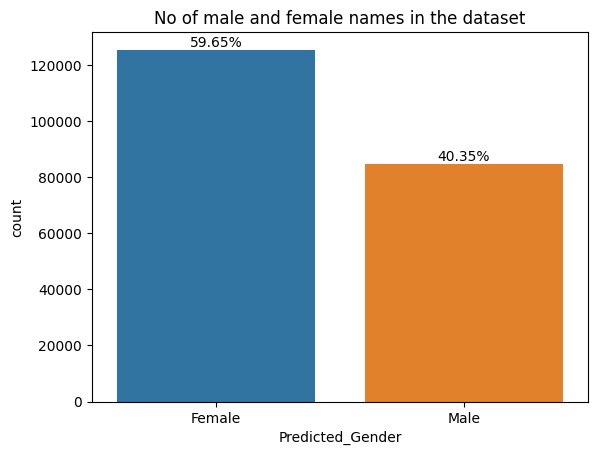

In [119]:
## plot for male and female names in the merged training data

# Calculate the counts and proportions
counts = merged_train_dt['Predicted_Gender'].value_counts()
proportions = counts / len(merged_train_dt)

# Sort the counts and proportions in descending order
sorted_counts = counts.sort_values(ascending=False)
sorted_proportions = proportions.loc[sorted_counts.index]

# Create the countplot with sorted data
ax = sns.countplot(x='Predicted_Gender', data=merged_train_dt, order=sorted_counts.index)

# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# Set the title and x-axis tick labels
plt.title('No of male and female names in the dataset')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()



### Train another model on merged data

In [67]:
## run clean function on names
merged_train_dt['Cleaned Name'] = merged_train_dt['Cleaned Name'].apply(clean_name)#apply(convert_float_and_remove_numbers).apply(truncate_drop_and_clean)
merged_train_dt.head()

,Cleaned Name,Predicted_Gender,customer_id
0,MUOKI,Male,NaN
1,PEACE,Female,NaN
2,MWIYERIA KANANA,Male,NaN
3,JACKLINE,Female,NaN
4,JANE MUTHONI,Female,NaN


In [68]:
## build model
X = list(merged_train_dt['Cleaned Name'])
Y = list(merged_train_dt['Predicted_Gender'])


In [69]:
## encode the labels
from sklearn.preprocessing import LabelEncoder



encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [70]:
## count vectorization
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer = 'char')
X = cv.fit_transform(X).toarray()

In [72]:
## split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state= 43)

In [73]:
### train another model on merged data
# Define the seed
seed = 43

XGB_model2 = XGBClassifier(random_state = seed) #use_label_encoder = False
XGB_model2.fit(x_train,y_train)

# Save the model and the seed
model_filename = "name_classification_xgb2.pkl"
model_data = {
    "model": XGB_model2,
    "seed": seed
}

with open(model_filename, "wb") as file:
    pickle.dump(model_data, file)


XGB_y_pred2 = XGB_model2.predict(x_test)

Accuracy: 96.64%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     41282
           1       0.97      0.95      0.96     28145

    accuracy                           0.97     69427
   macro avg       0.97      0.96      0.97     69427
weighted avg       0.97      0.97      0.97     69427

[[40336   946]
 [ 1386 26759]]
None


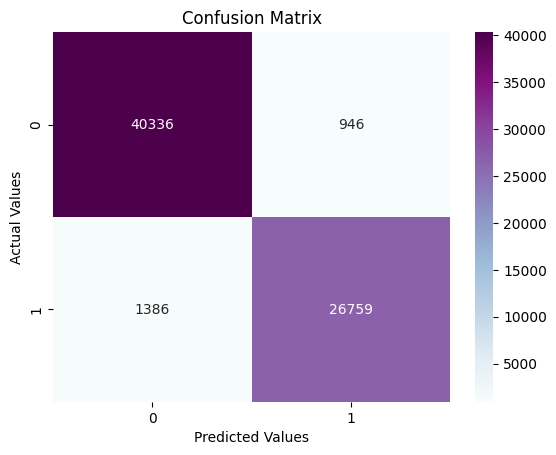

In [74]:
# for XGBoost
# print(metrics.accuracy_score(XGB_y_pred2,y_test))

accuracy = metrics.accuracy_score(XGB_y_pred2,y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

print(metrics.classification_report(y_test, XGB_y_pred2))

print(cmatrix(XGB_model2))

### Running Prediction on Entire Customer Profile Data

In [75]:
# Download  entire cust dataset from Domo
cust_prof = domo.ds_get('6ab44284-0840-4af4-a316-09e993e0065a')
cust_prof.head()

,customer_id,num_canisters,name,gender,is_club_customer
0,NaN,2973,NaN,NaN,NaN
1,1111966.0,1,MARY NGLN,1.0,0.0
2,1249576.0,1,AMIR,2.0,0.0
3,2730346.0,1,IRENE,NaN,0.0
4,841007.0,1,LEAH,1.0,0.0


In [76]:
## check shape
cust_prof.shape

(858890, 5)

In [77]:
# Map values from 1 to "female" and 2 to "male" in the 'Gender' column
cust_prof['gender'] = cust_prof['gender'].map({1: 'Female', 2: 'Male'})

In [78]:
## select key cols

cols_of_interest = ['customer_id','name']#,'gender'
cust_prof = cust_prof[cols_of_interest]
 

In [79]:

## filter data already in train data
cust_prof = cust_prof.reset_index(drop=True)
matched_rows = matched_rows.reset_index(drop=True)

df4 = cust_prof.drop(cust_prof[cust_prof['customer_id'].isin(matched_rows['customer_id'])].index)
## check shape after
df4.shape

(652755, 2)

In [80]:
## drop nas
df4 = df4.dropna(how = 'all')
## rename cols
df4 = df4.rename(columns= {'name': 'Name'})#,'gender':'Gender'
df4.head()

,customer_id,Name
2,1249576.0,AMIR
3,2730346.0,IRENE
5,1895917.0,BONIFACE WACHIRA
6,2542679.0,EDWARD WAMAI
8,2089987.0,LUCY MWANGI


In [81]:
  ## proportion of one-word names
one_word_names3 = round(count_one_word_names(df4['Name'])/len(df4)*100,2)

print(f"The proportion of one-word-names is: {one_word_names3}%")

The proportion of one-word-names is: 49.56%


### Pre-Processing Final Prediction Data

In [82]:
def add_name_length_column(names):
  """Adds a column of the number of characters in each name to a DataFrame.

  Args:
    names: A list of names.

  Returns:
    A DataFrame with a column of the number of characters in each name.
  """
  name_lengths = []
  for name in names:
    name_length = len(name)
    name_lengths.append(name_length)

  df = pd.DataFrame({'Name': names})
  df['Name Length'] = name_lengths
  return df

In [83]:
## check the name with most characters

# df4 = add_name_length_column(df4['Name']).sort_values(by ='Name Length' ,ascending=False)
# df4.head()

In [84]:

# Apply the truncate_names function to the 'Name' column
df4['Cleaned Name'] = df4['Name'].apply(clean_name)
df4.head()



,customer_id,Name,Cleaned Name
2,1249576.0,AMIR,AMIR
3,2730346.0,IRENE,IRENE
5,1895917.0,BONIFACE WACHIRA,BONIFACE WACHIRA
6,2542679.0,EDWARD WAMAI,EDWARD WAMAI
8,2089987.0,LUCY MWANGI,LUCY MWANGI


In [85]:
## preprocessing transforms
dm_test = list(df4['Cleaned Name'])

In [ ]:
# Replace NaN values with empty strings
# df_test2 = ['' if pd.isna(value) else value for value in df_test2]

## truncate to train data's number of attributes
# num_attributes = X.shape[1]

# truncated_array = cv.fit_transform(df_test2).toarray()[:, :num_attributes]

In [86]:
## vectorization

dm_test = cv.fit_transform(dm_test).toarray()

In [87]:
## check shape of training vs test data
# df_test2 = truncated_array
print("Shape of dm_test:", dm_test.shape)
# print("Shape of truncated_array:", truncated_array.shape)

print("Shape of df_train:", X.shape)

Shape of dm_test: (652754, 27)
Shape of df_train: (210384, 27)


In [88]:

## load and run saved model
### Run the model on new data


# Load the saved model and seed
model_filename = "name_classification_xgb2.pkl"

with open(model_filename, "rb") as file:
    model_data = pickle.load(file)

XGB_model2 = model_data["model"]
seed = model_data["seed"]


predictions2 = XGB_model2.predict(dm_test)

In [89]:
predictions2 = predictions2.tolist()
# customer_f_dt = customer_f_dt.reset_index(drop=True)

cust_profile_predictions = pd.DataFrame({'customer_id': df4['customer_id'],'Cleaned Name': df4['Cleaned Name'],'Predicted_Gender': encoder.inverse_transform(predictions2)
})
cust_profile_predictions.head()


,customer_id,Cleaned Name,Predicted_Gender
2,1249576.0,AMIR,Female
3,2730346.0,IRENE,Female
5,1895917.0,BONIFACE WACHIRA,Female
6,2542679.0,EDWARD WAMAI,Male
8,2089987.0,LUCY MWANGI,Female


In [90]:
cust_profile_predictions.shape

(652754, 3)

### Append Predictions to Train data

In [93]:
cust_prof_gender_predictions.head()

,customer_id,Cleaned Name,Predicted_Gender
0,1111966,MARY NGLN,Female
1,1249576,AMIR,Female
2,841007,LEAH,Female
3,1434685,JOSEPH,Male
4,2411225,NYAMWEYA,Male


In [94]:
## append matched rows with dt
all_cust_prof_data = pd.concat([cust_prof_gender_predictions,cust_profile_predictions],axis=0, ignore_index=True)
all_cust_prof_data.shape

(906490, 3)

In [95]:
all_cust_prof_data.head()

,customer_id,Cleaned Name,Predicted_Gender
0,1111966.0,MARY NGLN,Female
1,1249576.0,AMIR,Female
2,841007.0,LEAH,Female
3,1434685.0,JOSEPH,Male
4,2411225.0,NYAMWEYA,Male


In [96]:
## Drop Duplicated records
all_cust_prof_data.drop_duplicates(subset='customer_id', inplace=True)
all_cust_prof_data.shape

(858889, 3)

### Visualize Gender Proportions

In [97]:
  ## proportion of one-word names
one_word_names4 = round(count_one_word_names(all_cust_prof_data['Cleaned Name'])/len(all_cust_prof_data)*100,2)

print(f"The proportion of one-word-names is: {one_word_names4}%")

The proportion of one-word-names is: 52.64%


In [118]:
# %%
all_cust_prof_data['Predicted_Gender'].value_counts()

Female    502154
Male      356735
Name: Predicted_Gender, dtype: int64

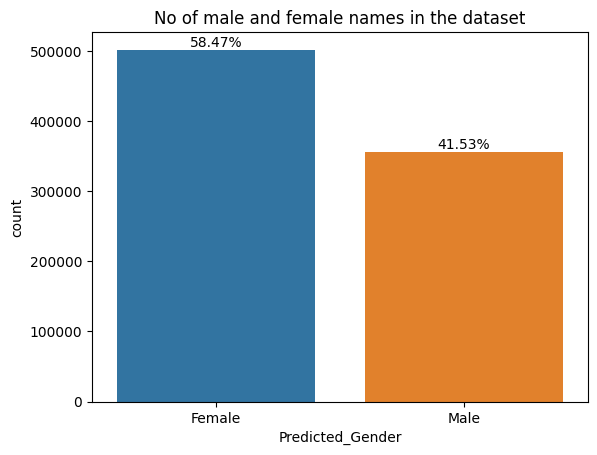

In [120]:
## plot for male and female names in the data

# Create the countplot
ax = sns.countplot(x='Predicted_Gender', data=all_cust_prof_data)

# Calculate the proportions for each category
total = len(all_cust_prof_data)
counts = all_cust_prof_data['Predicted_Gender'].value_counts()
proportions = counts / total

# Sort the counts and proportions in descending order
sorted_counts = counts.sort_values(ascending=False)
sorted_proportions = proportions.loc[sorted_counts.index]


# Add the proportions as annotations
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = f"{sorted_proportions[i]:.2%}"
    ax.annotate(label, (x, y), ha='center', va='bottom')

# Set the title and x-axis tick labels
plt.title('No of male and female names in the dataset')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Display the plot
plt.show()


In [132]:
## output predicted genders
all_cust_prof_data.to_csv('../../Njambanene/Tasks/Name_Identification/KOKO Users -Name based Gender Classification.csv',index=False)

## Note:
Although we were able to predict the gender of majority of the names accurately, below are are some disclaimers that influenced the accuracy of the model:
1. One-Word Names: There was a significant number of one word names both in the training set (~63%) and the test data (~50%) that reduces the ability to predict gender accurately.
2. Data Bias and Representation: There is a potential bias in the training data used to develop the model as female customers was ~60%  of the data. As such the model's predictions may reflect the biases present in the data, such as underrepresentation or overrepresentation.
3. Name Ambiguity and Variability: Some names had numbers, names of places-e.g. shops, special characters as well aliases that were dropped during name clean up. More-over some names can be gender-neutral or may have varying associations across different cultures, hence the model may be inaccurate in such instances. Names that are used for both males and females can introduce ambiguity in the model's predictions.
 

In [ ]:
## create a function based on ner (pre-trained named entity recognition (NER) model) for name-checking 
# import spacy

# def is_name(word):
#     # Load the pre-trained English NER model from spaCy
#     nlp = spacy.load('en_core_web_sm')
    
#     # Process the word with the NER model
#     doc = nlp(word)
    
#     # Check if any entity in the word is classified as a person (PERSON)
#     return any(ent.label_ == 'PERSON' for ent in doc.ents)

